In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.optimize as opt


# Visualizing

In [95]:
data = sio.loadmat('ex5data1.mat')

X = data['X'] #(12, 1)
y = data['y'] #(12, 1)
Xcv = data['Xval']
ycv = data['yval']
Xtest = data['Xtest']
ytest = data['ytest']
# color = '#00CED1'
# area = np.pi * 4**2  # 点面积 

# # 画散点图
# plt.scatter(X, y, s=area, c=color, alpha=0.4, label='Training data')
# plt.legend()

# plt.show()


# Cost function

In [89]:
def linearRegCost(theta, X, y, alpha):

    X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)
    X = np.matrix(X) #(12, 2)
    y = np.matrix(y)
    theta = np.matrix(theta)
    grad = np.zeros(theta.shape[1])
    m = len(X)
    
    cos = np.power((X * theta.T - y), 2) #(12, 1)
    reg = (alpha / (2 * m)) * np.sum(np.power(theta[:, 1:], 2))

    cost = np.sum(cos) / (2 * m) + reg
    for i in range(1, theta.shape[1]):
        grad[i] = np.sum((X * theta.T - y).T * X[:, 1:]) / m + (alpha / m) * theta[:, i]
    grad[0] = np.sum((X * theta.T - y).T * X[:, 0]) / m
 

    return cost, grad

In [90]:
theta = [1, 1]
J, grad = linearRegCost(theta, X, y, 1)
J, grad


(303.9931922202643, array([-15.30301567, 598.25074417]))

In [91]:
fmin = opt.minimize(fun=linearRegCost, x0=theta, args=(X, y, 0), method='TNC', jac=True, options={'maxiter':500})
fmin.x.shape

(2,)

In [92]:
def linearFit(data, theta_min):
    plt.xlabel('X')
    plt.ylabel('Y')
    X = data['X']
    y = data['y']
    theta_min = np.matrix(theta_min)
    X_bias = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)

    color = '#00CED1'
    area = np.pi * 4**2  # 点面积 

    #画直线
    y_pred = X_bias * theta_min.T
    plt.plot(X, y_pred, color='r')

    # 画散点图
    plt.scatter(X, y, s=area, c=color, alpha=0.4, label='Training data')
    plt.legend()

    plt.show()


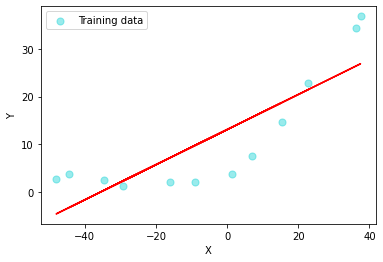

In [93]:
linearFit(data, fmin.x)

# Bias-variance

In [96]:
def highBias(X, y, Xcv, ycv, alpha, theta):
    m = len(X)
    train_error = np.zeros(m)
    cv_error = np.zeros(m)
    X = np.matrix(X)
    y = np.matrix(y)
    Xcv = np.matrix(Xcv)
    ycv = np.matrix(ycv)

    for i in range(m):
        X_i = X[:i, :]
        y_i = y[:i, :]
        fmin = opt.minimize(fun=linearRegCost, x0=theta, args=(X_i, y_i, 0), method='TNC', jac=True)
        theta = fmin.x
        train_error[i] = X_i * theta - y_i
        cv_error[i] = Xcv * theta - ycv
    return train_error, cv_error

In [97]:
train_error, cv_error = highBias(X, y, Xcv, ycv, 0, theta)
train_error, cv_error

ZeroDivisionError: division by zero